<a href="https://colab.research.google.com/github/MandarBorhade/British-Airways-DS-intership/blob/main/getting_started_british_airways_internship_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Organised boarding process. ...
1,✅ Trip Verified | Outward journey BA245 Londo...
2,✅ Trip Verified | Check in agent at LHR was ve...
3,✅ Trip Verified | Very disappointing. I book ...
4,✅ Trip Verified | Excellent service both on th...


In [9]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [10]:
# checking in on data

df.head()

,reviews
0,✅ Trip Verified | Organised boarding process. ...
1,✅ Trip Verified | Outward journey BA245 Londo...
2,✅ Trip Verified | Check in agent at LHR was ve...
3,✅ Trip Verified | Very disappointing. I book ...
4,✅ Trip Verified | Excellent service both on th...


##**Sentiment analysis**


In [11]:
# importing libraries
!pip install vaderSentiment
import regex as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

# lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


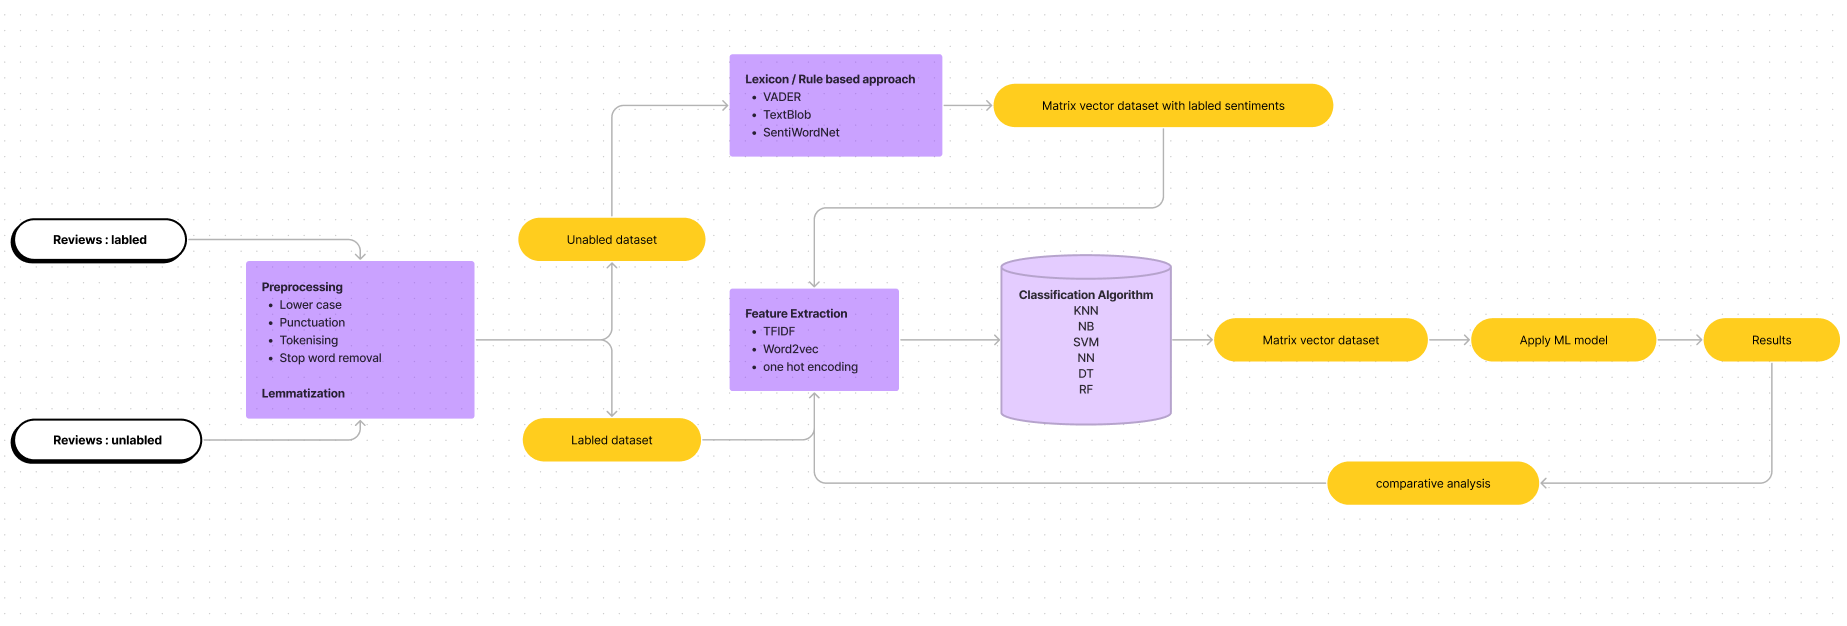

Here we would follow Lexicon / Rule based approach

###Text data preprocessing
* Lower case
* Punctuation
* Tokenising
* Stop word removal

In [12]:
def text_preprocessing(txt):

  # removing trip verified which is common for all
  txt = txt.split("|")[1]

  #Lower casing
  txt = txt.lower()

  #Removing punctuation
  # [ - character block start
  # ^ - not
  # \w - word characters
  # \s - space characters
  # ] - character block end

  txt = re.sub(r'[^\w\s]','',txt)

  # Tokenising
  txt = nltk.word_tokenize(txt)


  #Removing stop words
  without_stopwords = []
  stop_words = stopwords.words('english')
  for word in txt:
    if word not in stop_words:
      without_stopwords.append(word)
  
  

  # return txt , without_stopwords
  return without_stopwords



In [13]:
df['cleaned_reviews'] = df['reviews'].apply(text_preprocessing)

In [14]:
df.head()

,reviews,cleaned_reviews
0,✅ Trip Verified | Organised boarding process. ...,"[organised, boarding, process, really, friendl..."
1,✅ Trip Verified | Outward journey BA245 Londo...,"[outward, journey, ba245, london, buenos, aire..."
2,✅ Trip Verified | Check in agent at LHR was ve...,"[check, agent, lhr, helpful, friendly, flight,..."
3,✅ Trip Verified | Very disappointing. I book ...,"[disappointing, book, ba, fly, day, return, fl..."
4,✅ Trip Verified | Excellent service both on th...,"[excellent, service, ground, board, first, cla..."


Below methods are also part of text preprocessing
* POS tagging - Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.



* Lemmetisation - Lemmatization gives meaningful root words, however, it requires POS tags of the words.

* stemming - gives some meaningless root words as it simply chops off some characters in the end



In [15]:
def lemmatize_text(list2):
  lemmatized_string = ' '.join([lemmatizer.lemmatize(words) for words in list2])
  return lemmatized_string

In [16]:
df['lemmatized_sentence'] = df['cleaned_reviews'].apply(lemmatize_text)

In [17]:
df.head()

,reviews,cleaned_reviews,lemmatized_sentence
0,✅ Trip Verified | Organised boarding process. ...,"[organised, boarding, process, really, friendl...",organised boarding process really friendly cre...
1,✅ Trip Verified | Outward journey BA245 Londo...,"[outward, journey, ba245, london, buenos, aire...",outward journey ba245 london buenos aire club ...
2,✅ Trip Verified | Check in agent at LHR was ve...,"[check, agent, lhr, helpful, friendly, flight,...",check agent lhr helpful friendly flight crew s...
3,✅ Trip Verified | Very disappointing. I book ...,"[disappointing, book, ba, fly, day, return, fl...",disappointing book ba fly day return flight 6p...
4,✅ Trip Verified | Excellent service both on th...,"[excellent, service, ground, board, first, cla...",excellent service ground board first class pro...


##**VADER sentiment analysis**

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
def get_sentiment_score(txt):
  return analyzer.polarity_scores(txt)['compound']

def get_sentiment_class(txt):
  compound = analyzer.polarity_scores(txt)['compound']
  result = ''
  if compound >= 0.5:
    return 'Positive'
  elif compound < 0 :
    return 'Negative'
  else:
    return 'Neutral'

In [21]:
df['sentiment_score'] = df['lemmatized_sentence'].apply(get_sentiment_score)

In [22]:
df['sentiment'] = df['lemmatized_sentence'].apply(get_sentiment_class)

In [23]:
df.head()

,reviews,cleaned_reviews,lemmatized_sentence,sentiment_score,sentiment
0,✅ Trip Verified | Organised boarding process. ...,"[organised, boarding, process, really, friendl...",organised boarding process really friendly cre...,0.9371,Positive
1,✅ Trip Verified | Outward journey BA245 Londo...,"[outward, journey, ba245, london, buenos, aire...",outward journey ba245 london buenos aire club ...,-0.1868,Negative
2,✅ Trip Verified | Check in agent at LHR was ve...,"[check, agent, lhr, helpful, friendly, flight,...",check agent lhr helpful friendly flight crew s...,0.2516,Neutral
3,✅ Trip Verified | Very disappointing. I book ...,"[disappointing, book, ba, fly, day, return, fl...",disappointing book ba fly day return flight 6p...,-0.1531,Negative
4,✅ Trip Verified | Excellent service both on th...,"[excellent, service, ground, board, first, cla...",excellent service ground board first class pro...,0.9348,Positive


##**Visualization**

In [24]:
# importing libraries for visualising

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


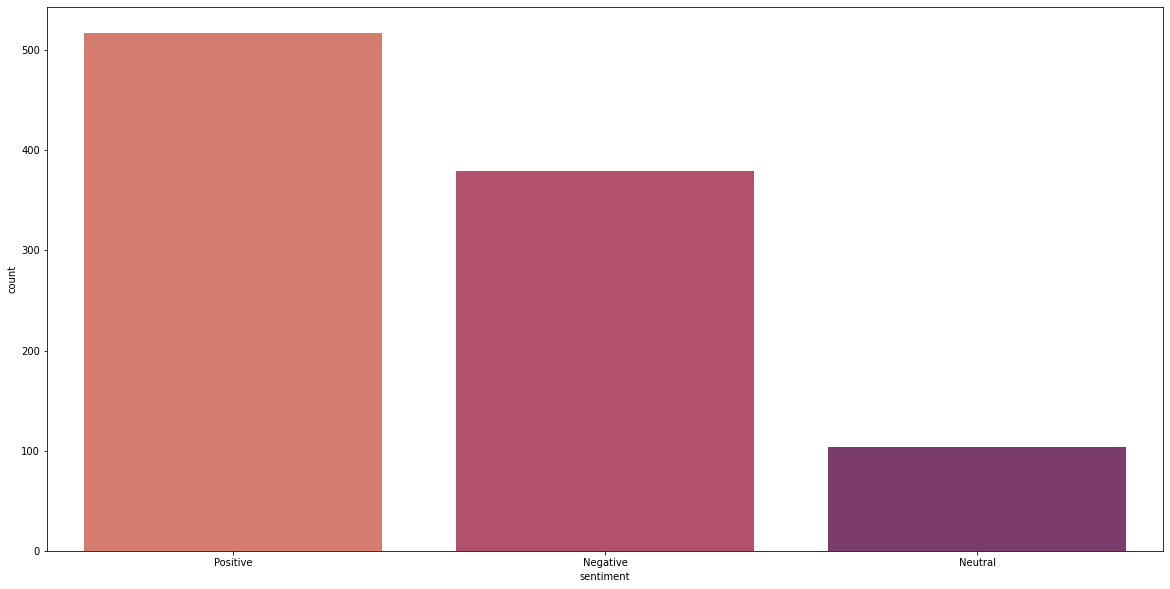

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(df['sentiment'] , palette = 'flare')
plt.show()

In [44]:
df['sentiment'].value_counts()

Positive    517
Negative    379
Neutral     104
Name: sentiment, dtype: int64

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=500,min_font_size=10,background_color='white')
txt = wc.generate(df['lemmatized_sentence'].str.cat(sep=" "))

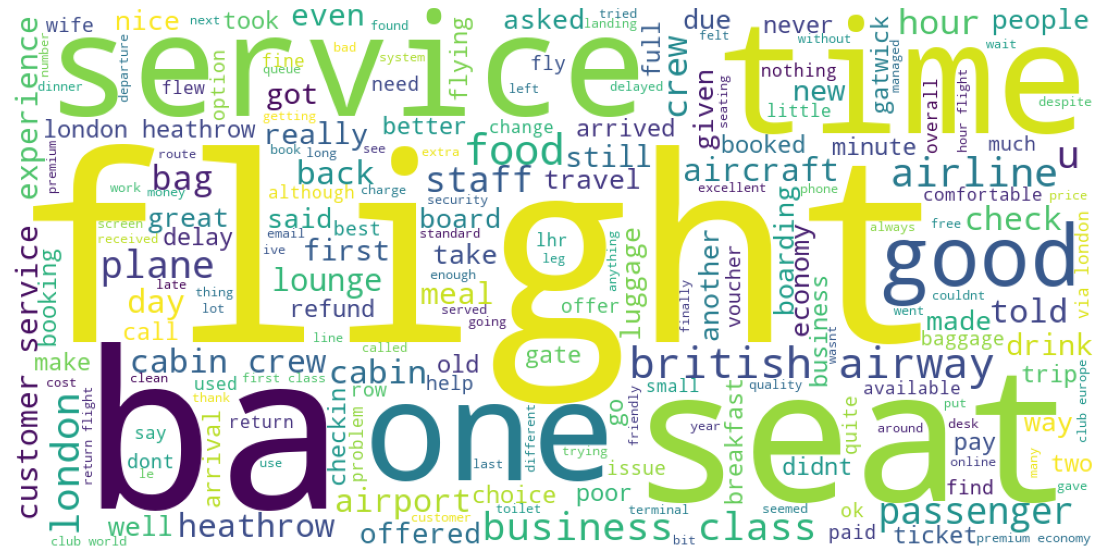

In [43]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(txt)

In [48]:
review_corpus = []
for msg in df['lemmatized_sentence'].tolist():
    for word in msg.split():
        review_corpus.append(word)

In [50]:
Counter(review_corpus).most_common(30)

[('flight', 2006),
 ('ba', 1169),
 ('seat', 981),
 ('service', 756),
 ('london', 671),
 ('time', 581),
 ('food', 519),
 ('crew', 517),
 ('hour', 502),
 ('good', 460),
 ('class', 445),
 ('cabin', 437),
 ('one', 431),
 ('airline', 405),
 ('staff', 395),
 ('business', 388),
 ('would', 379),
 ('british', 379),
 ('airway', 374),
 ('get', 348),
 ('heathrow', 334),
 ('u', 329),
 ('customer', 299),
 ('passenger', 286),
 ('plane', 282),
 ('day', 280),
 ('drink', 276),
 ('economy', 273),
 ('first', 272),
 ('back', 268)]

In [51]:
most_frequent_30 = pd.DataFrame(Counter(review_corpus).most_common(30))

In [52]:
most_frequent_30.head()

,0,1
0,flight,2006
1,ba,1169
2,seat,981
3,service,756
4,london,671


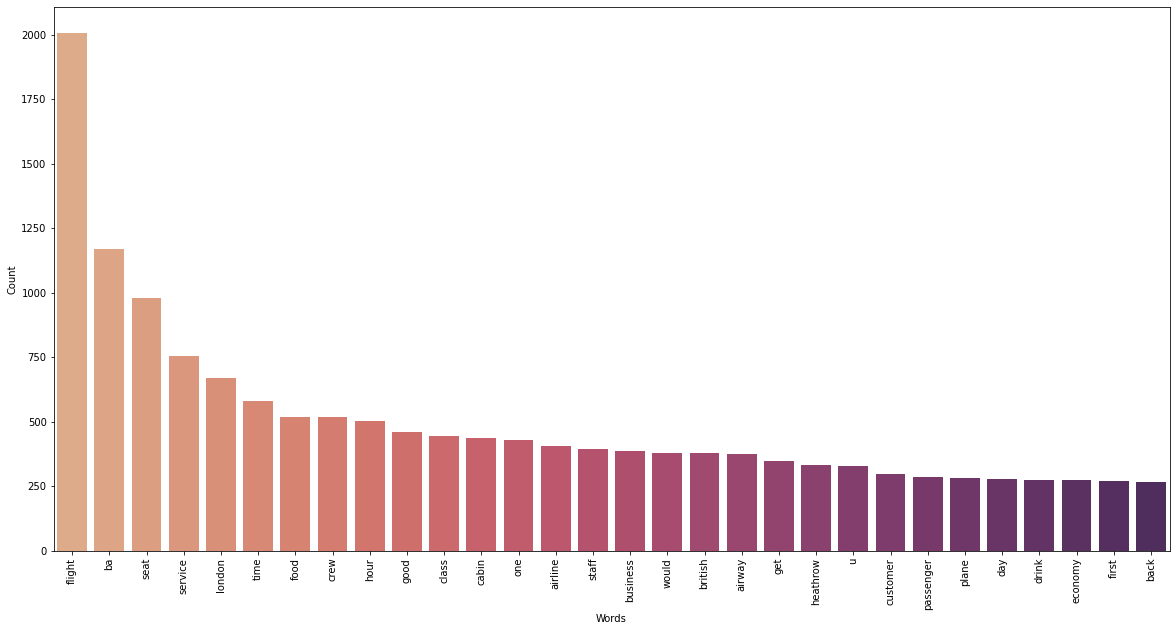

In [56]:
from collections import Counter
plt.figure(figsize=(20,10))
sns.barplot(x = most_frequent_30[0] , y = most_frequent_30[1] , palette = 'flare')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()